In [83]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np
import matplotlib.pyplot as plt
import mplfinance as mpf

# Import data from Excel
df = pd.read_excel('total-vcb.xlsx')
#Rename columns
df.columns = ['STT', 'Ngày', 'Mã', 'Tham chiếu', 'Open', 'Close', 'High', 'Low', 'Trung bình', 'Thay đổi giá', 'GD khớp lệnh', 'GD thỏa thuận', 'Volume', 'Vốn hóa thị trường', '+/-', '%', 'KL', 'GT']


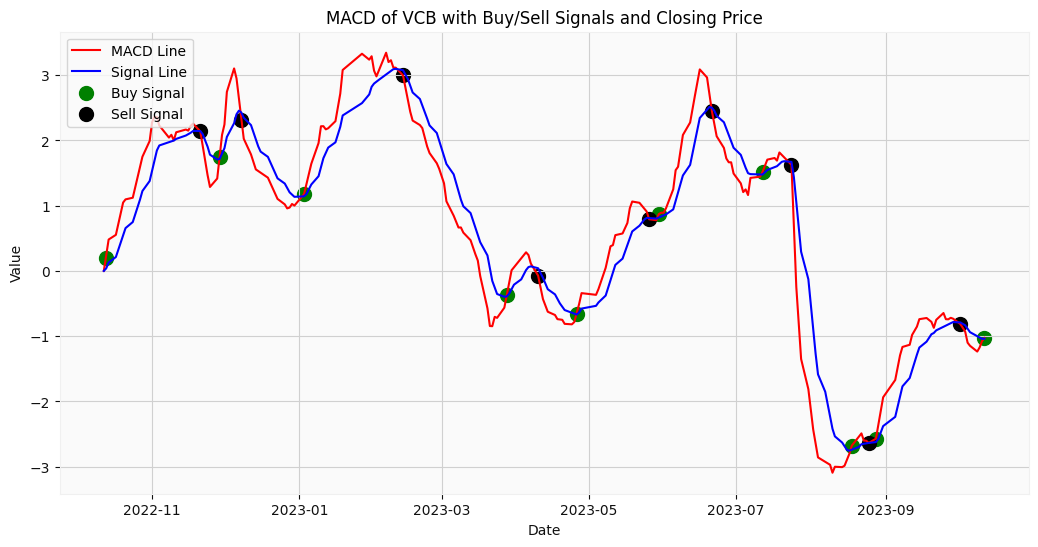

In [84]:
# Calculating ShortEMA, LongEMA, MACD, and Signal
ShortEMA = df['Close'].ewm(span=12, adjust=False).mean()
LongEMA = df['Close'].ewm(span=26, adjust=False).mean()
MACD = ShortEMA - LongEMA
signal = MACD.ewm(span=9, adjust=False).mean()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12.5, 6))

# Plot MACD and Signal lines
ax.plot(df['Ngày'], MACD, label='MACD Line', color='red')
ax.plot(df['Ngày'], signal, label='Signal Line', color='blue')

# Add Buy and Sell signals
buy_signals = (MACD > signal) & (MACD.shift(1) <= signal.shift(1))
sell_signals = (MACD < signal) & (MACD.shift(1) >= signal.shift(1))

# Adjust the size and color of buy and sell signals
ax.scatter(df['Ngày'][buy_signals], MACD[buy_signals], marker='o', color='green', s=100, label='Buy Signal')
ax.scatter(df['Ngày'][sell_signals], MACD[sell_signals], marker='o', color='black', s=100, label='Sell Signal')

# Set labels, title, and legend
ax.set_title('MACD of VCB with Buy/Sell Signals and Closing Price')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend(loc='upper left')
ax.grid(True)

# Show the plot
plt.show()


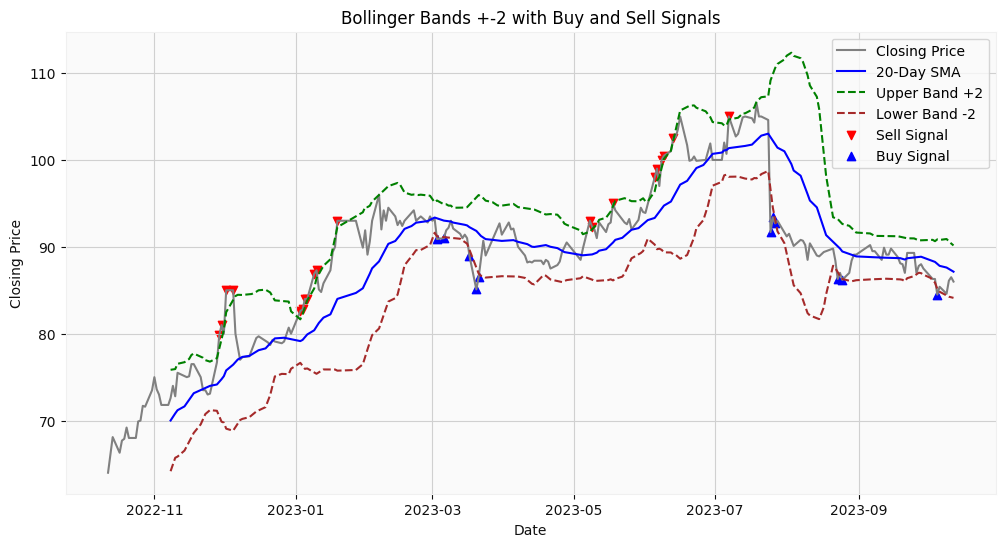

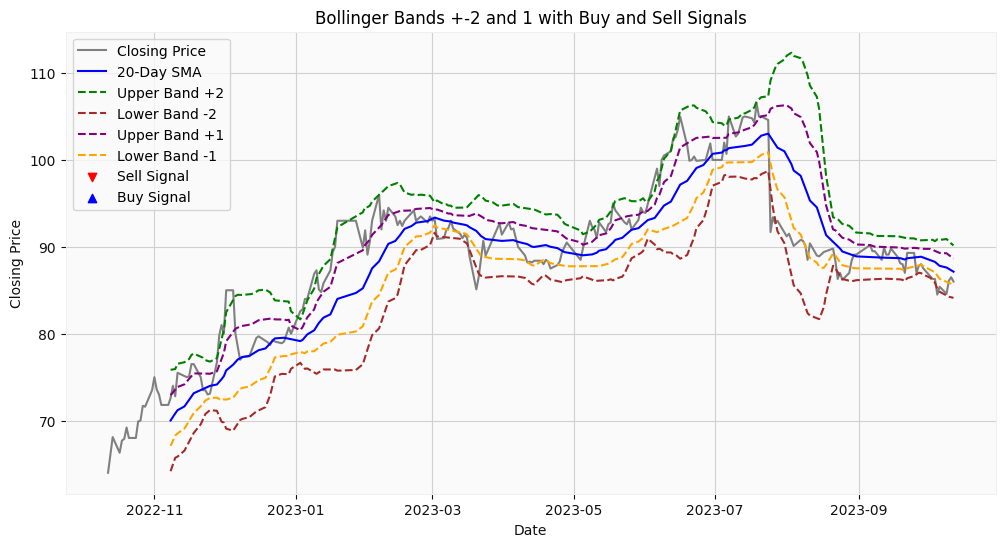

In [85]:
# Calculate rolling mean and standard deviation
df['SMA'] = df['Close'].rolling(window=20).mean()
df['stddev'] = df['Close'].rolling(window=20).std()

# Calculate Upper and Lower bands
df['Upper'] = df['SMA'] + 2 * df['stddev']
df['Lower'] = df['SMA'] - 2 * df['stddev']

# Identify sell and buy signals
df['Sell_Signal'] = np.where(df['Close'] > df['Upper'], True, False)
df['Buy_Signal'] = np.where(df['Close'] < df['Lower'], True, False)

# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(df['Ngày'], df['Close'], label='Closing Price', color='gray')
plt.plot(df['Ngày'], df['SMA'], label='20-Day SMA', color='blue')
plt.plot(df['Ngày'], df['Upper'], label='Upper Band +2', color='green', linestyle='--')
plt.plot(df['Ngày'], df['Lower'], label='Lower Band -2', color='brown', linestyle='--')
plt.scatter(df[df['Sell_Signal']]['Ngày'], df[df['Sell_Signal']]['Close'], marker='v', color='red', label='Sell Signal')
plt.scatter(df[df['Buy_Signal']]['Ngày'], df[df['Buy_Signal']]['Close'], marker='^', color='blue', label='Buy Signal')
plt.title('Bollinger Bands +-2 with Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


#Method 2

# Calculate rolling mean and standard deviation
df['SMA'] = df['Close'].rolling(window=20).mean()
df['stddev'] = df['Close'].rolling(window=20).std()

# Calculate Upper and Lower bands
df['Upper'] = df['SMA'] + 2 * df['stddev']
df['Lower'] = df['SMA'] - 2 * df['stddev']
df['Upper2'] = df['SMA'] + 1 * df['stddev']
df['Lower2'] = df['SMA'] - 1 * df['stddev']

# Identify sell and buy signals
df['Sell_Signal'] = np.where(df['Upper'] == df['Upper2'], True, False)
df['Buy_Signal'] = np.where(df['Lower'] == df['Lower2'], True, False)


#Create chart
plt.figure(figsize=(12, 6))
plt.plot(df['Ngày'], df['Close'], label='Closing Price', color='gray')
plt.plot(df['Ngày'], df['SMA'], label='20-Day SMA', color='blue')
plt.plot(df['Ngày'], df['Upper'], label='Upper Band +2', color='green', linestyle='--')
plt.plot(df['Ngày'], df['Lower'], label='Lower Band -2', color='brown', linestyle='--')
plt.plot(df['Ngày'], df['Upper2'], label='Upper Band +1', color='purple', linestyle='--')
plt.plot(df['Ngày'], df['Lower2'], label='Lower Band -1', color='orange', linestyle='--')
plt.scatter(df[df['Sell_Signal']]['Ngày'], df[df['Sell_Signal']]['Close'], marker='v', color='red', label='Sell Signal')
plt.scatter(df[df['Buy_Signal']]['Ngày'], df[df['Buy_Signal']]['Close'], marker='^', color='blue', label='Buy Signal')
plt.title('Bollinger Bands +-2 and 1 with Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()


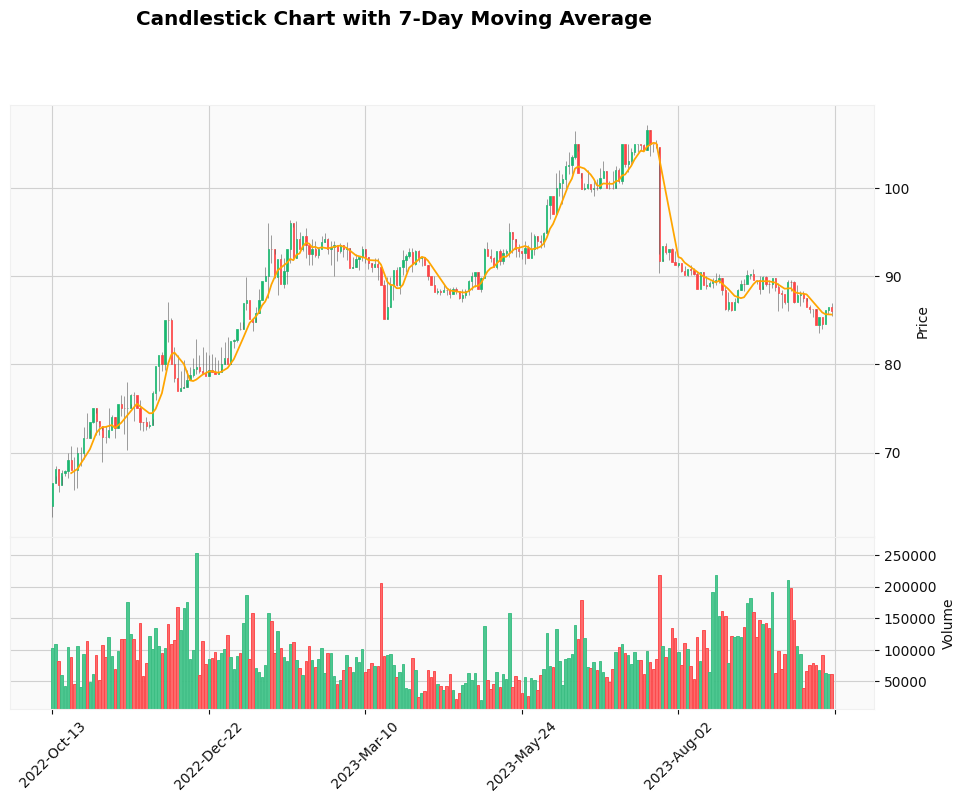

In [86]:
#Translate Date to Daytime and Set Index
df['Ngày'] = pd.to_datetime(df['Ngày'])
df = df.set_index('Ngày')

#Create MA 
df['Open'] = df['Close'].shift(1)
df_subset = df.tail(250)
apds = [mpf.make_addplot(df_subset['Close'].rolling(window=7).mean(), panel=0, color='orange', secondary_y=False)]

#Create chart
mpf.plot(df_subset, type='candle', style='yahoo',title='Candlestick Chart with 7-Day Moving Average', addplot=apds, volume=True, ylabel='Price', ylabel_lower='Volume', figscale=1.5)
plt.show()
